## Finding the strenght of Cement

### Importing Libraries

In [189]:
from pycaret.regression import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import joblib

In [145]:
df=pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### EDA

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [147]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


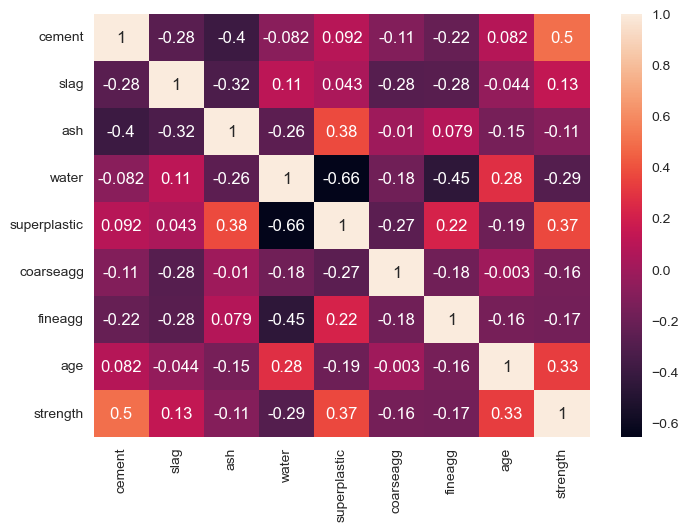

In [148]:

sns.heatmap(df.corr(),annot=True,cmap="rocket")
plt.show()

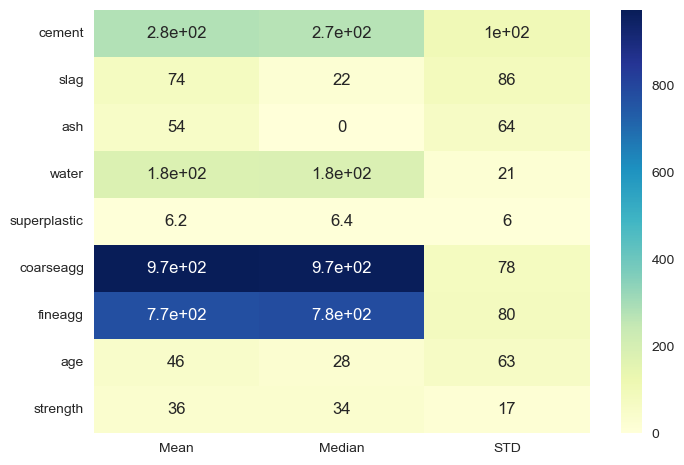

In [149]:
mean=df.mean()
median=df.median()
std=df.std()
a=pd.DataFrame({'Mean':mean.tolist(),'Median':median.tolist(),'STD':std.tolist()},index=median.index.tolist())
sns.heatmap(a,annot=True,cmap='YlGnBu')
plt.show()

#### Cement

In [150]:
fig=px.histogram(df.cement,marginal='box')
fig.show()

In [151]:
def detect_outlier_z_score(data,threshold=3):
    mean=np.mean(data)
    std=np.std(data)
    z_scores=[(x-mean)/std for x in data]
    outliers=[x for i,x in enumerate(data) if np.abs(z_scores[i])>threshold]
    return outliers

outliers=detect_outlier_z_score(df.cement,3)
print(outliers)

[]


#### No outliers

#### Slag

In [152]:
fig=px.histogram(df.slag,title="Histogram of Slag",marginal="box")
fig.show()

In [153]:
def detect_outlier_z_score(data,threshold=3):
    mean=np.mean(data)
    std=np.std(data)
    z_scores=[(x-mean)/std for x in data]
    outliers=[]
    for i,x in enumerate(data):
        if z_scores[i]>threshold or z_scores[i]<-threshold:
            outliers.append(x)
    return outliers
outliers=detect_outlier_z_score(df.slag,3)
print(outliers)

[342.1, 342.1, 359.4, 359.4]


In [154]:
def fix_z_score(data,threshold=3):
    mean=np.mean(data)
    std=np.std(data)
    upper_bound=mean+threshold*std
    lower_bound=mean-threshold*std
    z_scores=[(x-mean)/std for x in data]
    for i,x in enumerate(data):
        if z_scores[i]>threshold:
            data[i]=upper_bound
        if z_scores[i]<-threshold:
            data[i]=lower_bound
fix_z_score(df.slag,3)

In [155]:
fig=px.histogram(df.slag,title="Histogram of Slag",marginal="box")
fig.show()

In [156]:
outliers=fix_z_score(df.ash,3)
print(outliers)

None


#### Ash

In [157]:
fig=px.histogram(df.ash,title="Histogram of Ash",marginal="box")
fig.show()

In [158]:
outliers=detect_outlier_z_score(df.ash,3)
print(outliers)

[]


#### Water

In [159]:
fig=px.histogram(df.water,title="Histogram of Water",marginal="box")
fig.show()

In [160]:
fix_z_score(df.water,3)

In [161]:
print(np.mean(df.water)+3*np.std(df.water))

245.57234062956732


In [162]:
outliers=detect_outlier_z_score(df.water,3)
print(outliers)

[245.59883132012828, 245.59883132012828]


In [163]:
fig=px.histogram(df.water,title="Histogram of Water",marginal="box")
fig.show()

#### Superplastic

In [164]:
fig=px.histogram(df.superplastic,title="Histogram of Superplastic",marginal="box")
fig.show()

In [165]:
outliers=detect_outlier_z_score(df.superplastic,3)
print(outliers)

[28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]


In [166]:
fix_z_score(df.superplastic,3)
fig=px.histogram(df.superplastic,title="Histogram of Superplastic",marginal="box")
fig.show()

#### Coarseagg

In [167]:
fig=px.histogram(df.coarseagg,title="Histogram of Coarseagg",marginal="box")
fig.show()

In [168]:
outliers=detect_outlier_z_score(df.ash,3)
print(outliers)

[]


#### Fineagg

In [169]:
fig=px.histogram(df.fineagg,title="Histogram of Fineagg",marginal="box")
fig.show()

In [170]:
outliers=detect_outlier_z_score(df.fineagg,3)
print(outliers)

[]


#### age

In [171]:
fig=px.histogram(df.age,title="Histogram of Ash",marginal="box")
fig.show()

In [172]:
outliers=detect_outlier_z_score(df.age,3)
print(outliers)

[365, 365, 270, 360, 365, 365, 270, 270, 270, 270, 270, 360, 360, 365, 360, 365, 365, 270, 365, 270, 270, 365, 365, 365, 360, 270, 270, 365, 360, 270, 365, 365, 270]


#### Strenght

In [173]:
fig=px.histogram(df.strength,title="Histogram of Ash",marginal="box")
fig.show()

In [174]:
outliers=detect_outlier_z_score(df.strength,3)
print(outliers)

[]


In [215]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.825372,54.188350,181.564658,6.145607,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.058467,63.997004,21.346259,5.759096,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,332.608170,200.100000,245.598831,24.117482,1145.000000,992.600000,365.000000,82.600000


### Model

In [194]:
X=df.drop(['strength'],axis=1)
y=df['strength']

In [195]:
reg=setup(data=df,target='strength')
compare_models()

,Description,Value
0,Session id,8702
1,Target,strength
2,Target type,Regression
3,Data shape,"(1030, 9)"
4,Train data shape,"(721, 9)"
5,Test data shape,"(309, 9)"
6,Numeric features,8
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,3.0960,21.0102,4.5360,0.9211,0.1447,0.1056,0.1970
lightgbm,Light Gradient Boosting Machine,3.2545,21.4994,4.5931,0.9191,0.1429,0.1097,0.2640
et,Extra Trees Regressor,3.1589,22.8870,4.7422,0.9142,0.1420,0.1055,0.1280
rf,Random Forest Regressor,3.5961,26.2568,5.0801,0.9014,0.1587,0.1242,0.1530
gbr,Gradient Boosting Regressor,3.8093,26.7742,5.1228,0.8999,0.1591,0.1289,0.0690
dt,Decision Tree Regressor,4.6383,49.0019,6.9388,0.8142,0.2171,0.1579,0.0240
ada,AdaBoost Regressor,6.4314,61.1754,7.8029,0.7706,0.2774,0.2608,0.0670
knn,K Neighbors Regressor,7.1678,93.6860,9.6137,0.6499,0.3100,0.2733,0.0290
en,Elastic Net,8.1255,106.1419,10.2470,0.6035,0.3279,0.3085,0.0270
ridge,Ridge Regression,8.1222,106.1263,10.2458,0.6035,0.3275,0.3079,0.0270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=8702, ...)

### Lightgbm

In [196]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [198]:
lgbm=lgb.LGBMRegressor()
lgbm.fit(X_train,y_train)

LGBMRegressor()

In [199]:
lgbm.score(X_test,y_test)

0.918382974239084

In [200]:
lgbm.score(X_train,y_train)

0.9813716964133293

In [201]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
995,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365
507,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,28
334,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3
848,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56
294,238.2,158.8,0.0,185.7,0.0,1040.6,734.3,28
...,...,...,...,...,...,...,...,...
87,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,14
330,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14
466,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3
121,250.0,0.0,95.7,191.8,5.3,948.9,857.2,56


### Extract Model

In [202]:
joblib.dump(lgbm,'c_s.joblib')

['c_s.joblib']

In [203]:
cs=joblib.load('c_s.joblib')

In [213]:
a=X_train[2:3]
a

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
334,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3


In [214]:
cs.predict([[323.7,282.8,0.0,183.8,10.3,942.7,659.9,3]])

array([32.5437865])

In [210]:
y_train[2:3]

334    28.3
Name: strength, dtype: float64

### Standration

In [121]:
df1=df.copy()

In [134]:
X=df1.drop(['strength','ash'],axis=1)

In [135]:
scaler=StandardScaler()

In [136]:
scaler.fit(X)

StandardScaler()

In [137]:
s_d=scaler.transform(X)

In [138]:
y=df1['strength']

In [139]:
reg1=setup(data=X,target=y)
compare_models()

,Description,Value
0,Session id,6234
1,Target,strength
2,Target type,Regression
3,Data shape,"(1030, 8)"
4,Train data shape,"(721, 8)"
5,Test data shape,"(309, 8)"
6,Numeric features,7
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.5585,27.5975,5.1750,0.8960,0.1593,0.1224,0.0450
et,Extra Trees Regressor,3.4568,29.4587,5.3636,0.8878,0.1635,0.1186,0.1180
gbr,Gradient Boosting Regressor,3.9763,30.9675,5.4781,0.8838,0.1720,0.1375,0.0670
xgboost,Extreme Gradient Boosting,3.5520,31.0731,5.4991,0.8815,0.1698,0.1209,0.0680
rf,Random Forest Regressor,3.8981,32.5945,5.6525,0.8770,0.1754,0.1359,0.1520
dt,Decision Tree Regressor,4.8986,60.5304,7.6538,0.7699,0.2286,0.1662,0.0280
ada,AdaBoost Regressor,6.6680,66.5895,8.1146,0.7505,0.2899,0.2756,0.0750
knn,K Neighbors Regressor,7.1211,91.3703,9.4912,0.6563,0.3102,0.2759,0.0260
br,Bayesian Ridge,8.5879,116.4277,10.7373,0.5630,0.3452,0.3324,0.0230
ridge,Ridge Regression,8.5837,116.5186,10.7441,0.5627,0.3439,0.3307,0.0280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(random_state=6234)

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lgbm1=lgb.LGBMRegressor()
lgbm1.fit(X_train,y_train)
lgbm1.score(X_test,y_test)

0.9160112028208413

In [143]:
lgbm1.score(X_train,y_train)

0.9811978387851121